In [1]:
import import_ipynb
from ConsistencyIndexes import *
import torch
import torch.nn.functional as F
from matplotlib import pyplot as plt

importing Jupyter notebook from ConsistencyIndexes.ipynb
importing Jupyter notebook from Functions.ipynb


### Get Original Frames

In [2]:
cap = open_vid("VDB/X.mp4")
org = get_frames(cap)
_,_,fps,_ = get_props(cap)

Width:  640
Height:  320
FPS:  24.0
Frame Count:  36


### Get Cartoonized Frames

In [3]:
cap = open_vid("Cartoonized/Xtoon.mp4")
car = get_frames(cap)
_,_,fps,_ = get_props(cap)

Width:  640
Height:  320
FPS:  24.0
Frame Count:  36


### Calculate 2D Kernel

In [113]:
def find_2Dkernel(input_images, target_images, kernel_size=3, epochs=1000, learning_rate=1e-3):
    # Normalize input and target images (to 0-1)
    input_images = [img / 255.0 for img in input_images]
    target_images = [img / 255.0 for img in target_images]
    # Convert input and target images to tensors
    input_images = torch.stack([torch.tensor(img, dtype=torch.float32) for img in input_images])
    target_images = torch.stack([torch.tensor(img, dtype=torch.float32) for img in target_images])
    # Image Size
    height = input_images[0].shape[0]
    width = input_images[0].shape[1]
    # Use an optimizer to update the kernel
    optimizer = torch.optim.SGD([kernel], lr=learning_rate)
    # List of Loss over time
    L = []
    # Iterate over epochs
    for epoch in range(epochs):
        total_loss = 0
        optimizer.zero_grad()  # Clear the gradients from the previous iteration
        # Iterate through each image and calculate the total loss
        for i in range(len(input_images)):
            # Separate each color channel
            r = input_images[i][:,:,0].view(1, 1, height, width)
            g = input_images[i][:,:,1].view(1, 1, height, width)
            b = input_images[i][:,:,2].view(1, 1, height, width)
            # Apply convolution to each channel
            cr = F.conv2d(r, kernel, padding=1)
            cg = F.conv2d(g, kernel, padding=1)
            cb = F.conv2d(b, kernel, padding=1)
            # Calculate the loss
            loss = (F.mse_loss(cr, target_images[i][:,:,0].unsqueeze(0).unsqueeze(0)) +
                    F.mse_loss(cg, target_images[i][:,:,1].unsqueeze(0).unsqueeze(0)) +
                    F.mse_loss(cb, target_images[i][:,:,2].unsqueeze(0).unsqueeze(0)))
            # Add to total loss
            total_loss += loss.item()
            loss.backward()  # Compute gradients
        optimizer.step()  # Update the kernel with the computed gradients
        # Add total loss to list over ecpochs
        L.append(total_loss)
        # Print loss every 10 iterations
        if iteration % 1 == 0:
            print(f"Iteration {epoch+1}/{epochs}, Total Loss: {total_loss}",end='\r')
    # Return the optimized kernel and list of loss over epochs
    return kernel.detach().numpy(),L

In [92]:
k,l = find_2Dkernel(org,car,3,1000,1e-3)

In [93]:
print(k)

[[[[ 0.4491005  -0.34302577  0.20977691]
   [ 0.11876388 -0.21754417  0.28502595]
   [-0.3968136   1.1985881  -0.36275345]]]]


[[[[ 0.4491005  -0.34302577  0.20977691]
   [ 0.11876388 -0.21754417  0.28502595]
   [-0.3968136   1.1985881  -0.36275345]]]]
<br>
For X.mp4 and Xtoon.mp4 with 3x3 kernel, 1000 epochs and 1e-3 learning rate

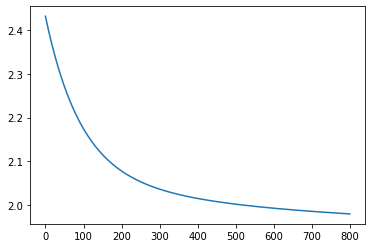

In [106]:
plt.plot(l[200:])

### Apply Calculated Karnel to image

In [57]:
def apply_kernel(input_image, kernel):
    # Ensure input image is a float tensor and normalize it
    input_image = torch.tensor(input_image, dtype=torch.float32) / 255.0
    # Convert the kernel to a PyTorch tensor if it is not already
    if not isinstance(kernel, torch.Tensor):
        kernel = torch.tensor(kernel, dtype=torch.float32)
    # Get the dimensions of the input image
    height, width, channels = input_image.shape
    # Ensure size of image for convolution
    r = input_image[:,:,0].view(1, 1, height, width)
    g = input_image[:,:,1].view(1, 1, height, width)
    b = input_image[:,:,2].view(1, 1, height, width)
    # Apply the kernel to each channel
    cr = F.conv2d(r, kernel, padding=1)
    cg = F.conv2d(g, kernel, padding=1)
    cb = F.conv2d(b, kernel, padding=1)
    # Stack the channels back together
    output_image = torch.cat([cr, cg, cb], dim=1).squeeze(0).permute(1, 2, 0).detach().numpy()
    # Denormalize the output image (from 0-1 back to 0-255) and clip values to valid range
    output_image = (output_image * 255.0).clip(0, 255).astype('uint8')
    return output_image

In [116]:
C = [apply_kernel(o,k) for o in org]

In [117]:
ThroughFrames(C)

#### Differences (Black is zero difference)

In [ ]:
D = [np.abs(car[i]-apply_kernel(org[i],k)) for i in range(len(car))]

In [122]:
ThroughFrames(D)

KeyboardInterrupt: 

In [ ]:
def find_2Dkernel(input_images, target_images, kernel_size=3, epochs=1000, learning_rate=1e-3):
    # Normalize input and target images (to 0-1)
    input_images = [img / 255.0 for img in input_images]
    target_images = [img / 255.0 for img in target_images]
    # Convert input and target images to tensors
    input_images = torch.stack([torch.tensor(img, dtype=torch.float32) for img in input_images])
    target_images = torch.stack([torch.tensor(img, dtype=torch.float32) for img in target_images])
    # Image Size
    height = input_images[0].shape[0]
    width = input_images[0].shape[1]
    # Use an optimizer to update the kernel
    optimizer = torch.optim.SGD([kernel], lr=learning_rate)
    # List of Loss over time
    L = []
    # Iterate over epochs
    for epoch in range(epochs):
        total_loss = 0
        optimizer.zero_grad()  # Clear the gradients from the previous iteration
        # Iterate through each image and calculate the total loss
        for i in range(len(input_images)):
            # Separate each color channel
            r = input_images[i][:,:,0].view(1, 1, height, width)
            g = input_images[i][:,:,1].view(1, 1, height, width)
            b = input_images[i][:,:,2].view(1, 1, height, width)
            # Apply convolution to each channel
            cr = F.conv2d(r, kernel, padding=1)
            cg = F.conv2d(g, kernel, padding=1)
            cb = F.conv2d(b, kernel, padding=1)
            # Calculate the loss
            loss = (F.mse_loss(cr, target_images[i][:,:,0].unsqueeze(0).unsqueeze(0)) +
                    F.mse_loss(cg, target_images[i][:,:,1].unsqueeze(0).unsqueeze(0)) +
                    F.mse_loss(cb, target_images[i][:,:,2].unsqueeze(0).unsqueeze(0)))
            # Add to total loss
            total_loss += loss.item()
            loss.backward()  # Compute gradients
        optimizer.step()  # Update the kernel with the computed gradients
        # Add total loss to list over ecpochs
        L.append(total_loss)
        # Print loss every 10 iterations
        if iteration % 1 == 0:
            print(f"Iteration {epoch+1}/{epochs}, Total Loss: {total_loss}",end='\r')
    # Return the optimized kernel and list of loss over epochs
    return kernel.detach().numpy(),L

In [ ]:
# Kernel for each channel